In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv("D:\\BCU Final\\ML\\Dataset\\NON EEG\\mergeddata\\merged_data1.csv")

In [3]:
df

,Hour,Minute,Second,HeartRate,SpO2,Label,Subject ID
0,15.0,8.0,28.0,96.0,97.0,Relax,Subject 10
1,15.0,8.0,29.0,96.0,96.0,Relax,Subject 10
2,15.0,8.0,30.0,97.0,96.0,Relax,Subject 10
3,15.0,8.0,31.0,96.0,96.0,Relax,Subject 10
4,15.0,8.0,32.0,96.0,96.0,Relax,Subject 10
...,...,...,...,...,...,...,...
46224,14.0,53.0,51.0,74.0,95.0,Relax,Subject 9
46225,14.0,53.0,52.0,74.0,95.0,Relax,Subject 9
46226,14.0,53.0,53.0,74.0,95.0,Relax,Subject 9
46227,14.0,53.0,54.0,74.0,95.0,Relax,Subject 9


# Checking Data Frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46229 entries, 0 to 46228
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hour        46229 non-null  float64
 1   Minute      46229 non-null  float64
 2   Second      46229 non-null  float64
 3   HeartRate   46229 non-null  float64
 4   SpO2        46229 non-null  float64
 5   Label       46229 non-null  object 
 6   Subject ID  46229 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.5+ MB


# Checking Non Values

In [5]:
df.isna().sum().sum()

0

In [6]:
df['Label'].value_counts()

Relax              24050
EmotionalStress     8523
CognitiveStress     7111
PhysicalStress      6545
Name: Label, dtype: int64

In [7]:
df

,Hour,Minute,Second,HeartRate,SpO2,Label,Subject ID
0,15.0,8.0,28.0,96.0,97.0,Relax,Subject 10
1,15.0,8.0,29.0,96.0,96.0,Relax,Subject 10
2,15.0,8.0,30.0,97.0,96.0,Relax,Subject 10
3,15.0,8.0,31.0,96.0,96.0,Relax,Subject 10
4,15.0,8.0,32.0,96.0,96.0,Relax,Subject 10
...,...,...,...,...,...,...,...
46224,14.0,53.0,51.0,74.0,95.0,Relax,Subject 9
46225,14.0,53.0,52.0,74.0,95.0,Relax,Subject 9
46226,14.0,53.0,53.0,74.0,95.0,Relax,Subject 9
46227,14.0,53.0,54.0,74.0,95.0,Relax,Subject 9


In [8]:
df['Index'] = df['Subject ID'].astype(str) + df['Hour'].astype(int).astype(str) + df['Minute'].astype(int).astype(str) + df['Second'].astype(int).astype(str)
df_1 = df.set_index('Index')

total_data = df.sort_values(['Subject ID', 'Hour', 'Minute', 'Second'])
total_data = total_data.reset_index()

In [9]:
df1 = total_data.loc[total_data['Subject ID'] == 'Subject 1']

NameError: name 'plt' is not defined

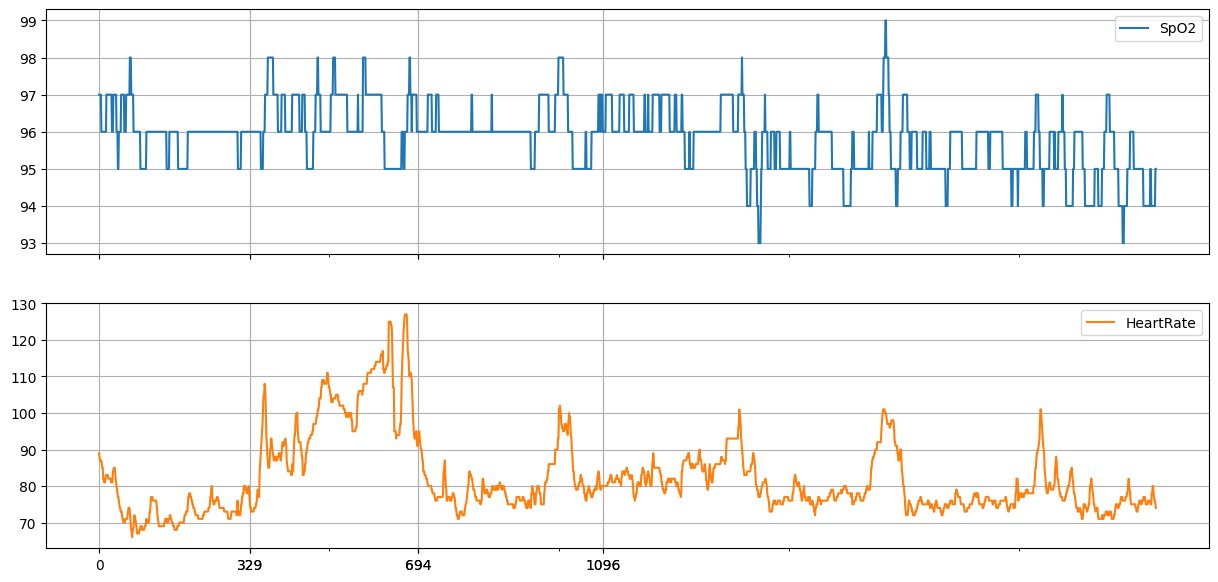

In [10]:
relax1 = len(df1.index[df1.Label == 'Relax1'])
physicals = relax1+len(df1.index[df1.Label == 'PhysicalStress'])
relax2 = physicals+len(df1.index[df1.Label == 'Relax2'])
cogns = relax2+len(df1.index[df1.Label == 'CognitiveStress'])
relax3 = cogns+len(df1.index[df1.Label == 'Relax3'])
emotions = relax3+len(df1.index[df1.Label == 'EmotionalStress'])
relax4 = emotions+len(df1.index[df1.Label == 'Relax4'])
x = [relax1, physicals, relax2, cogns, relax3, emotions, relax4]

text_values = ['Relax1', 'Physical Stress', 'Relax2', 'Cognitive Stress', 'Relax3', 'Emotional Stress', 'Relax4']

df1.plot(subplots=True,figsize=(15,7),grid=True, xticks=x, y=['SpO2', 'HeartRate'], use_index=True)
plt.xticks(x, text_values)
plt.show()

In [12]:

relax1 = len(df.index[df.Label == 'Relax1'])
physicals = relax1+len(df.index[df.Label == 'PhysicalStress'])
relax2 = physicals+len(df.index[df.Label == 'Relax2'])
cogns = relax2+len(df.index[df.Label == 'CognitiveStress'])
relax3 = cogns+len(df.index[df.Label == 'Relax3'])
emotions = relax3+len(df.index[df.Label == 'EmotionalStress'])
relax4 = emotions+len(df.index[df.Label == 'Relax4'])
x = [relax1, physicals, cogns, emotions]

text_values = ['Relax1', 'Physical Stress', 'Cognitive Stress', 'Emotional Stress']

In [11]:
df['Label'].value_counts()

Relax              24050
EmotionalStress     8523
CognitiveStress     7111
PhysicalStress      6545
Name: Label, dtype: int64

In [13]:
import scipy as sc
import matplotlib.pyplot as plt

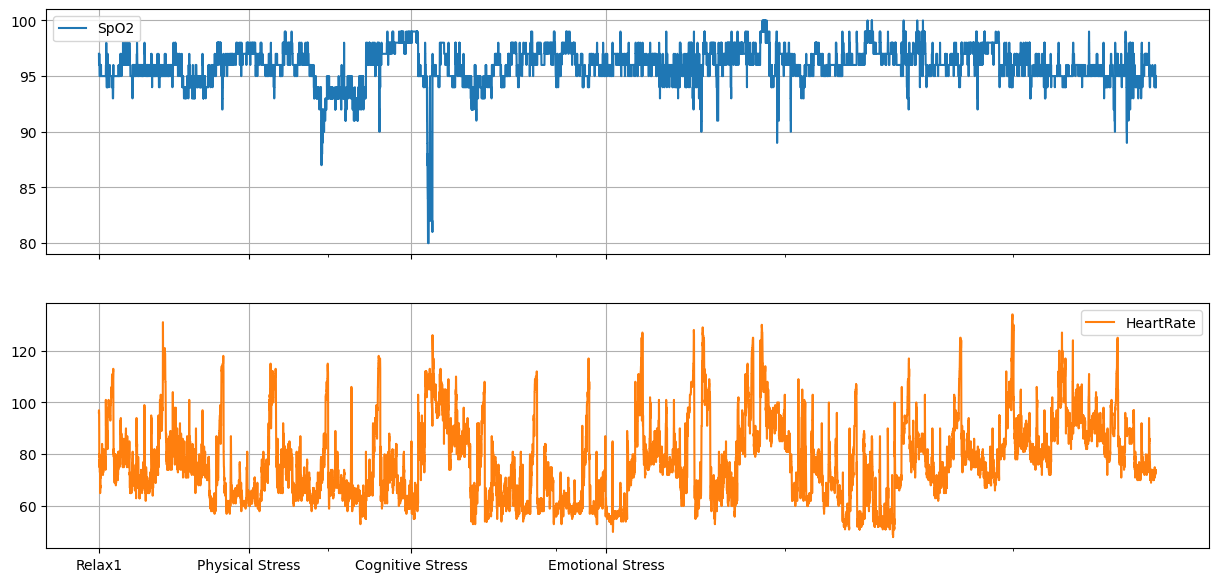

In [14]:
text_values = ['Relax1', 'Physical Stress', 'Cognitive Stress', 'Emotional Stress']

df.plot(subplots=True,figsize=(15,7),grid=True, xticks=x, y=['SpO2', 'HeartRate'], use_index=True)
plt.xticks(x, text_values)
plt.show()

# Feature Selection


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
features = df[['Hour', 'Minute', 'Second', 'HeartRate', 'SpO2']]
target = df['Label']

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
pca = PCA(n_components=2)  
reduced_features = pca.fit_transform(scaled_features)

In [19]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [0.25587176 0.2423417 ]


In [20]:
reduced_data = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])

In [21]:
reduced_data['Label'] = target

In [22]:
target

0        Relax
1        Relax
2        Relax
3        Relax
4        Relax
         ...  
46224    Relax
46225    Relax
46226    Relax
46227    Relax
46228    Relax
Name: Label, Length: 46229, dtype: object